In [1]:
import os
import sys
print(os.path.abspath(os.curdir))  
os.chdir("..")  # go to parent folder
os.chdir("..")  # go to parent folder

print(os.path.abspath(os.curdir))  
sys.path.insert(0, os.path.abspath(os.curdir))
# from NMRKineticSimu import Xe129, Methanol, TestSample10MHzT, Mainz, TestStation
# from NMRKineticSimu import *
import numpy as np
import matplotlib.pyplot as plt
from DataAnalysis import *

\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\Supplementary\20220818_AxionWindSimulation
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code


In [19]:
plt.rc('font', size=12)
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = 'cm'  # 'dejavuserif'

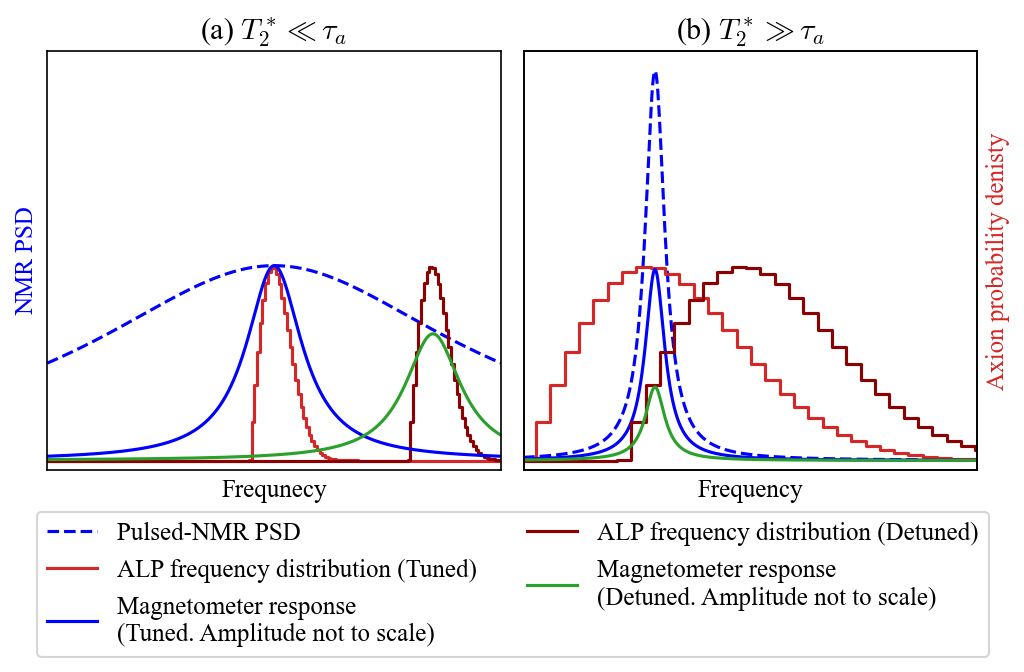

In [20]:
taua = 1
T2star0 = 1/(np.pi*20)
T2star1 = 1/(np.pi*0.2)
freq_arr = np.linspace(start=-30, stop=30, num=10000, endpoint=True)

Lorz0 = Lorentzian(x=freq_arr, center=1, gamma=1/(np.pi*T2star0), area=1/(np.pi*T2star0) * np.pi / 2 , offset=0.)
Lorz0_ALP = Lorentzian(x=freq_arr, center=1, gamma=1/(taua/3), area=1/(taua/3) * np.pi / 2, offset=0.)
Lorz0_ALP_detuned = Lorentzian(x=freq_arr, center=1, gamma=1/(taua/3), area=0.65 * 1/(taua/3) * np.pi / 2, offset=0.)

Rayleigh0 = fRayleigh( x=freq_arr, sigma = 1/taua)/ 0.61

Lorz1 = Lorentzian(x=freq_arr, center=1, gamma=1/(np.pi*T2star1), area=1/(np.pi*T2star1) * np.pi, offset=0.)
Lorz1_ALP = Lorentzian(x=freq_arr, center=1, gamma=1/(np.pi*T2star1/1), area=0.78*1/(np.pi*T2star1/1) * np.pi / T2star1 * taua, offset=0.)
Lorz1_ALP_detuned = Lorentzian(x=freq_arr, center=1, gamma=1/(np.pi*T2star1/1), area=0.3*1/(np.pi*T2star1/1) * np.pi / T2star1 * taua, offset=0.)

Rayleigh1 = fRayleigh(x=freq_arr, sigma = 1/taua)/ 0.61

plt.rc('font', size=12)
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = 'cm'  # 'dejavuserif'
fig = plt.figure(figsize=(8, 3.7), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=2)  #
fig.subplots_adjust(wspace=0.05)
ax = fig.add_subplot(gs[0,0])
ax.plot(freq_arr, Lorz0, label='NMR spectrum\nlinewidth = $\\dfrac{1}{\\pi T_2^*}$', color='blue', alpha=1, linestyle='--')
ax.step(freq_arr[0:-1:20], Rayleigh0[0:-1:20], label='ALP frequency distribution\nlinewidth = $\\dfrac{1}{\\tau_a}$', \
    color='tab:red', alpha=1)
ax.step(freq_arr[0:-1:20]+7, Rayleigh0[0:-1:20], label='', color='darkred', alpha=1)

ax.plot(freq_arr, Lorz0_ALP, label='Magnetometer response', color='blue', alpha=1)
ax.plot(freq_arr+7, Lorz0_ALP_detuned, \
    label='Magnetometer response', color='tab:green', alpha=1)
ax.set_ylabel('NMR PSD', color='blue')
ax.set_xlabel('Frequnecy')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(1-10, 1+10)
ax.set_ylim(-0.05, 2.1)
ax.set_title('(a) $T_2^* \\ll \\tau_a$')
# ax.text(x=-10, y=1,s='(a)')
# ax.legend(loc='upper left')
# ax.grid()
# ax.legend(loc='upper right')
ax01 = fig.add_subplot(gs[0,1])
ax01.plot(freq_arr, Lorz1, label='Pulsed-NMR PSD', color='blue', alpha=1, linestyle='--')  # \nFWHM = $\\dfrac{1}{\\pi T_2^*}$
ax01.step(freq_arr[0:-1:20], Rayleigh1[0:-1:20], label='ALP frequency distribution (Tuned)', color='tab:red', alpha=1)
ax01.plot(freq_arr, Lorz1_ALP, label='Magnetometer response\n(Tuned. Amplitude not to scale)', \
    color='blue', alpha=1)


ax01.step(freq_arr[0:-1:20]+0.8, Rayleigh1[0:-1:20], label='ALP frequency distribution (Detuned)', \
    color='darkred', alpha=1)  # FWHM $\\sim \ \\dfrac{1}{\\tau_a}$
ax01.plot(freq_arr, Lorz1_ALP_detuned, label='Magnetometer response\n(Detuned. Amplitude not to scale)', \
    color='tab:green', alpha=1)

# ax.plot(GammaandSAmp_arr, GammaandSAmp_arr, label='SNR', alpha=1)
# ax.step(, , where='post', label='', alpha=1)
ax01.set_ylabel('')
ax01.set_xlabel('Frequency')
ax01.set_title('(b) $T_2^* \\gg \\tau_a$')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax01.set_xlim(1.5-1.6, 1+2.7)
ax01.set_ylim(-0.05, 2.1)
ax01.set_xticks([])
ax01.set_yticks([])
ax012 = ax01.twinx()
ax012.set_ylabel('Axion probability denisty', color = 'tab:red')  # Probability denisty
ax012.set_yticks([])
ax01.legend(bbox_to_anchor=(-1.1, -0.07), loc='upper left', ncol=2)
# fig.suptitle('resolution = samplelinewidth')
# fig.suptitle('chunksize = 1.0 s')
# plt.tight_layout()

plt.show()

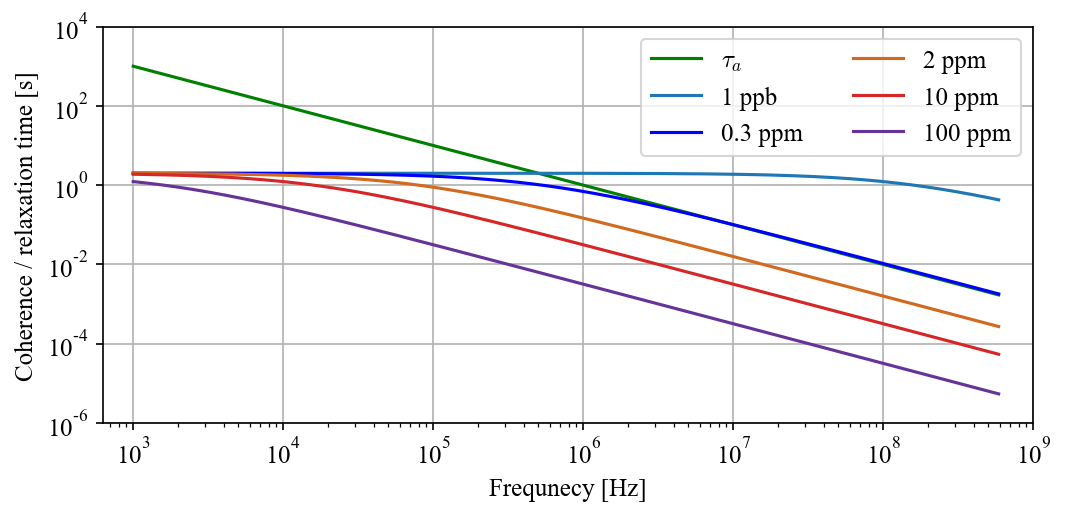

In [21]:
T2 = 2

freq_arr = 10 ** np.linspace(start=np.log(1e3)/np.log(10), stop=np.log(14*42*1e6)/np.log(10), num=1000, endpoint=True)

homog0 = 2e-6
homog1 = 10e-6
homog2 = 100e-6


Tdelta0 = 1 / (np.pi * homog0 * freq_arr)
Tdelta1 = 1 / (np.pi * homog1 * freq_arr)
Tdelta2 = 1 / (np.pi * homog2 * freq_arr)


T2star0_arr = Tdelta0 * T2/(Tdelta0 + T2)
T2star1_arr = Tdelta1 * T2/(Tdelta1 + T2)
T2star2_arr = Tdelta2 * T2/(Tdelta2 + T2)

homog3 = 0.3e-6
Tdelta3 = 1 / (np.pi * homog3 * freq_arr)
T2star3_arr = Tdelta3 * T2/(Tdelta3 + T2)


homog4 = 1e-9
Tdelta4 = 1 / (np.pi * homog4 * freq_arr)
T2star4_arr = Tdelta4 * T2/(Tdelta4 + T2)

homog5 = 1e-12
Tdelta5 = 1 / (np.pi * homog5 * freq_arr)
T2star5_arr = Tdelta5 * T2/(Tdelta5 + T2)

taua_arr = 1e6 / freq_arr

# plt.rc('font', size=12)
fig = plt.figure(figsize=(8, 5*0.7), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=1)  #
fig.subplots_adjust(wspace=0.05)
ax = fig.add_subplot(gs[0,0])
# ax.plot(freq_arr, T2star5_arr, label='$10^{-6}$ ppm', alpha=1, linestyle='-')
ax.plot(freq_arr, taua_arr, label='$\\tau_a$', color='green', alpha=1, linestyle='-')
ax.plot(freq_arr, T2star4_arr, label='1 ppb', alpha=1, linestyle='-')
ax.plot(freq_arr, T2star3_arr, label='0.3 ppm', color='b', alpha=1, linestyle='-')
ax.plot(freq_arr, T2star0_arr, label='2 ppm', color='chocolate', alpha=1, linestyle='-')
ax.plot(freq_arr, T2star1_arr, label='10 ppm', color='tab:red', alpha=1, linestyle='-')
ax.plot(freq_arr, T2star2_arr, label='100 ppm', color='rebeccapurple', alpha=1, linestyle='-')


# ax.step(freq_arr[0:-1:20], Rayleigh0[0:-1:20], label='ALP frequency distribution\nlinewidth = $\\dfrac{1}{\\tau_a}$', color='tab:red', alpha=1)
# ax.vlines(x=1e6, ymin = 1e-6, ymax = 1e5, colors='black', linestyles='dotted', label='')
# ax.hlines(y=1 / ((np.pi * homog0 * 1e6) + 1 / T2), xmin = 1e2, xmax = 1e6, colors='black', linestyles='dotted', label='')
# ax.hlines(y=1 / ((np.pi * homog1 * 1e6) + 1 / T2), xmin = 1e2, xmax = 1e6, colors='black', linestyles='dotted', label='')
# ax.hlines(y=1 / ((np.pi * homog2 * 1e6) + 1 / T2), xmin = 1e2, xmax = 1e6, colors='black', linestyles='dotted', label='')
# ax.hlines(y=1, xmin = 1e2, xmax = 1e6, colors='black', linestyles='dotted', label='')

# ax.plot(GammaandSAmp_arr, GammaandSAmp_arr, label='SNR', alpha=1)
# ax.step(, , where='post', label='', alpha=1)
ax.set_ylabel('Coherence / relaxation time [s]')
ax.set_xlabel('Frequnecy [Hz]')
# ax.set_title('PSD Signal Amplitude')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(10**np.arange(3,10))
# ax.set_yticks([])
ax.set_xlim(10**2.8, 1e9)
ax.set_ylim(1e-6, 1e4)
# ax.set_title('(a) $T_2^* \\ll \\tau_a$')
# ax.text(x=-10, y=1,s='(a)')
# ax.legend(loc='upper left')
ax.grid()

ax.legend(loc='upper right', ncol=2)


# fig.suptitle('chunksize = 1.0 s')
# plt.tight_layout()
plt.show()